In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [6]:
def diffmodel_a(t, c, k, h, D, cb):
    N = len(c)
    rinv = np.arange(1,2*N,2)
    # discretisation
    A2 = 1/h**2*(-2*np.eye(N) + np.eye(N, k=-1) + np.eye(N, k=1))
    A2f = 1/h**2*np.vstack(( [1,0], np.zeros((N-2,2)), [0,1] ))
    A1 = 1/(2*h)*(-np.eye(N, k=-1) + np.eye(N, k=1))
    
    A1f = 1/(2*h)*np.vstack(( [-1,0], np.zeros((N-2,2)), [0,1] ))
    RM = 2/h* np.diag(1/rinv)
    # BC discretization
    a = (k*h)/(2*D)
    B1 = np.hstack(( [[1], [0]], np.zeros((2,N-2)), [[0], [(1-a)/(1+a)]] ))
    B0 = np.array([0,2*a/(1+a)])
    # assembly
    dcdt = D*((A2+A2f@B1+2*RM@(A1+A1f@B1))@c+(A2f@B0+2*RM@A1f@B0)*cb)
    return dcdt

In [7]:


def partdiffmodel(t, c, k, h, D, cb):
    N = len(c)
    rinv = np.arange(1,2*N,2) # start, stop, step
    # discretisation
    A2 = 1/h**2*(-2*np.eye(N) + np.eye(N, k=-1) + np.eye(N, k=1))
    A2f = 1/h**2*np.vstack(( [1,0], np.zeros((N-2,2)), [0,1] ))
    A1 = 1/(2*h)*(-np.eye(N, k=-1) + np.eye(N, k=1))
    A1f = 1/(2*h)*np.vstack(([-1,0], np.zeros((N-2,2)), [0,1] ))
    RM = 2/h* np.diag(1/rinv)
    # BC discretization
    a = k*h/(2*D)
    B1 = np.hstack(( [[1], [0]], np.zeros((2,N-2)), [[0], [(1-a)/(1+a)]] ))
    B0 = np.array([0, 2*a/(1+a)])
    # assembly
    dcdt = D*((A2@c + A2f@(B1@c + B0*cb)) + 2*RM@(A1@c + A1f@(B1@c + B0*cb)))
    return dcdt


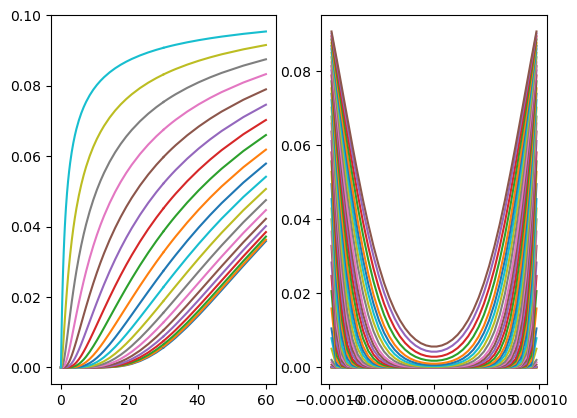

In [8]:
# parameters
D = 2e-11
k = 5e-6
R = 100e-6
cb = 0.1
# mesh
N = 20
h = R/N
r = np.arange(h/2, R, h)
# init
cinit = np.zeros(N)
tspan = np.array([0, 30])
# solve
sol = solve_ivp(lambda t, c: diffmodel_a(t, c, k, h, D, cb), tspan, cinit, method = 'BDF') #partdiffmodel, diffmodel_a
t1 = sol.t
c1 = sol.y.T
c2init = c1[-1,:].T
t2span = tspan[1] + tspan
sol = solve_ivp(lambda t, c: diffmodel_a(t, c, k, h, D, cb), t2span, c2init, method = 'BDF')
t2 = sol.t
c2 = sol.y.T
cprofile = np.hstack(( c1[:,-1::-1], c1 )).T
rprofile = np.hstack(( -r[-1::-1], r ))
plt.figure()
plt.subplot(1, 2, 1)
plt.plot(t1, c1, t2, c2)
plt.subplot(1, 2, 2)
plt.plot(rprofile, cprofile)
plt.show(block=False)